In [1]:
pip install -q keras-nlp

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow import keras
import keras_nlp
import matplotlib.pyplot as plt
import os
from PIL import Image

2024-05-09 09:30:05.607057: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 09:30:05.607161: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 09:30:05.760313: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Using TensorFlow backend


In [3]:
df = pd.read_csv('/kaggle/input/memotion-dataset/Memotion 3/updated_train.csv')
img_folder = '/kaggle/input/memotion-dataset/Memotion 3/trainImages'
target_shape = (224, 224)
images = []

df['humour'] = df['humour'].replace({'not_funny': 0, 'funny': 1, 'very_funny': 1, 'hilarious' : 1})
df['sarcastic'] = df['sarcastic'].replace({'not_sarcastic': 0, 'twisted_meaning': 1, 'general' : 1, 'little_sarcastic' : 1, 'very_sarcastic' : 1, 'very_twisted' : 1})
df['offensive'] = df['offensive'].replace({'not_offensive': 0, 'offensive': 1, 'slight' : 1, 'very_offensive' : 1, 'hateful_offensive': 1})
df['motivational'] = df['motivational'].replace({'not_motivational': 0, 'motivational': 1})

for index, row in df.iterrows():
    if pd.isna(row['ocr']):
        df.at[index, 'ocr'] = '.'

#X_train_txt
X_train_txt = df['ocr']
X_train_txt = X_train_txt.tolist()
X_train_txt = [s.replace('\n', ' ') for s in X_train_txt]

#X_train_image
for index,row in df.iterrows():
    img_path = os.path.join(img_folder, str(row['image_id'])+'.jpg')
    image = Image.open(img_path)
    image = image.resize(target_shape)
    images.append(image)
    
X_train_img = np.array(images)

# Combine the columns into a new DataFrame
Y_train = pd.concat([df['humour'], df['sarcastic'], df['offensive'], df['motivational']], axis=1)
Y_train = np.array(Y_train, dtype=np.int32)

/tmp/ipykernel_34/1009993135.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['humour'] = df['humour'].replace({'not_funny': 0, 'funny': 1, 'very_funny': 1, 'hilarious' : 1})
/tmp/ipykernel_34/1009993135.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sarcastic'] = df['sarcastic'].replace({'not_sarcastic': 0, 'twisted_meaning': 1, 'general' : 1, 'little_sarcastic' : 1, 'very_sarcastic' : 1, 'very_twisted' : 1})
/tmp/ipykernel_34/1009993135.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will 

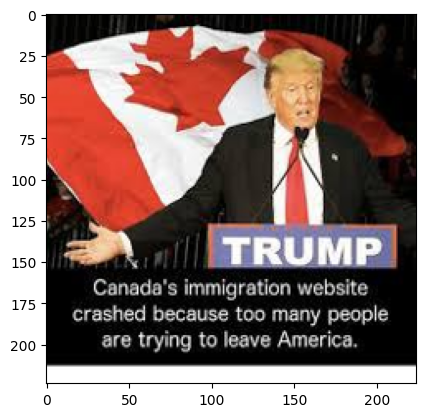

In [4]:
plt.imshow(X_train_img[2354])

In [5]:
X_train_txt[2354]

"TRUMP Canada's immigration website crashed because too many people are trying to leave America."

In [6]:
df = pd.read_csv('/kaggle/input/memotion-dataset/Memotion 3/updated_val.csv')
img_folder = '/kaggle/input/memotion-dataset/Memotion 3/valImages'
images = []

df['humour'] = df['humour'].replace({'not_funny': 0, 'funny': 1, 'very_funny': 1, 'hilarious' : 1})
df['sarcastic'] = df['sarcastic'].replace({'not_sarcastic': 0, 'twisted_meaning': 1, 'general' : 1, 'little_sarcastic' : 1, 'very_sarcastic' : 1, 'very_twisted' : 1})
df['offensive'] = df['offensive'].replace({'not_offensive': 0, 'offensive': 1, 'slight' : 1, 'very_offensive' : 1, 'hateful_offensive': 1})
df['motivational'] = df['motivational'].replace({'not_motivational': 0, 'motivational': 1})

for index, row in df.iterrows():
    if pd.isna(row['ocr']):
        df.at[index, 'ocr'] = '.'

#X_train_txt
X_val_txt = df['ocr']
X_val_txt = X_val_txt.tolist()
X_val_txt = [s.replace('\n', ' ') for s in X_val_txt]

#X_train_image
for index,row in df.iterrows():
    img_path = os.path.join(img_folder, str(row['image_id'])+'.jpg')
    image = Image.open(img_path)
    image = image.resize(target_shape)
    images.append(image)
    
X_val_img = np.array(images)

# Combine the columns into a new DataFrame
Y_val = pd.concat([df['humour'], df['sarcastic'], df['offensive'], df['motivational']], axis=1)
Y_val = np.array(Y_val, dtype=np.int32)

/tmp/ipykernel_34/2062857121.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['humour'] = df['humour'].replace({'not_funny': 0, 'funny': 1, 'very_funny': 1, 'hilarious' : 1})
/tmp/ipykernel_34/2062857121.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sarcastic'] = df['sarcastic'].replace({'not_sarcastic': 0, 'twisted_meaning': 1, 'general' : 1, 'little_sarcastic' : 1, 'very_sarcastic' : 1, 'very_twisted' : 1})
/tmp/ipykernel_34/2062857121.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will 

In [7]:
Y_train[:5]

array([[1, 1, 0, 0],
       [1, 1, 1, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0]], dtype=int32)

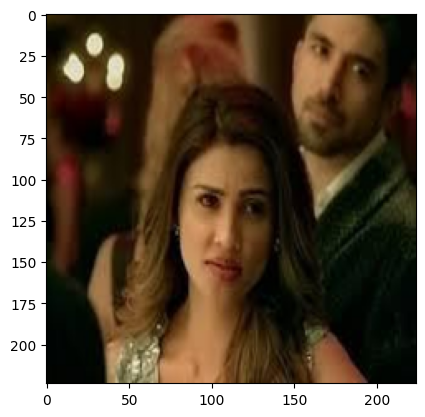

In [8]:
plt.imshow(X_val_img[715])

In [9]:
X_val_txt[715]

'.'

In [10]:
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

###  **Distil_BERT_Multi**

In [11]:
# Use a shorter sequence length.
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(
    "distil_bert_base_multi",
    sequence_length=128,
)
# Pretrained classifier.
base_model_text = keras_nlp.models.DistilBertClassifier.from_preset(
    "distil_bert_base_multi",
    num_classes=4,  # Adjust num_classes to match the number of labels
    preprocessor=preprocessor,
)

# Adjust the model's output layer for multi-label classification
base_model_text.layers[-1].activation = keras.activations.sigmoid

# Access backbone programmatically (e.g., to change `trainable`).
base_model_text.backbone.trainable = False

pooled_output = base_model_text.get_layer('pooled_dense').output

# Add a dense layer with 1024 neurons and sigmoid activation
txt_features = Dense(512, activation='relu')(pooled_output)

# Define the new model with the added layer
model_txt = Model(inputs=base_model_text.input, outputs=txt_features)


Attaching 'tokenizer.json' from model 'keras/distil_bert/keras/distil_bert_base_multi/2' to your Kaggle notebook...
Attaching 'tokenizer.json' from model 'keras/distil_bert/keras/distil_bert_base_multi/2' to your Kaggle notebook...
Attaching 'assets/tokenizer/vocabulary.txt' from model 'keras/distil_bert/keras/distil_bert_base_multi/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/distil_bert/keras/distil_bert_base_multi/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/distil_bert/keras/distil_bert_base_multi/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/distil_bert/keras/distil_bert_base_multi/2' to your Kaggle notebook...
/opt/conda/lib/python3.10/site-packages/keras_nlp/src/models/backbone.py:93: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._func

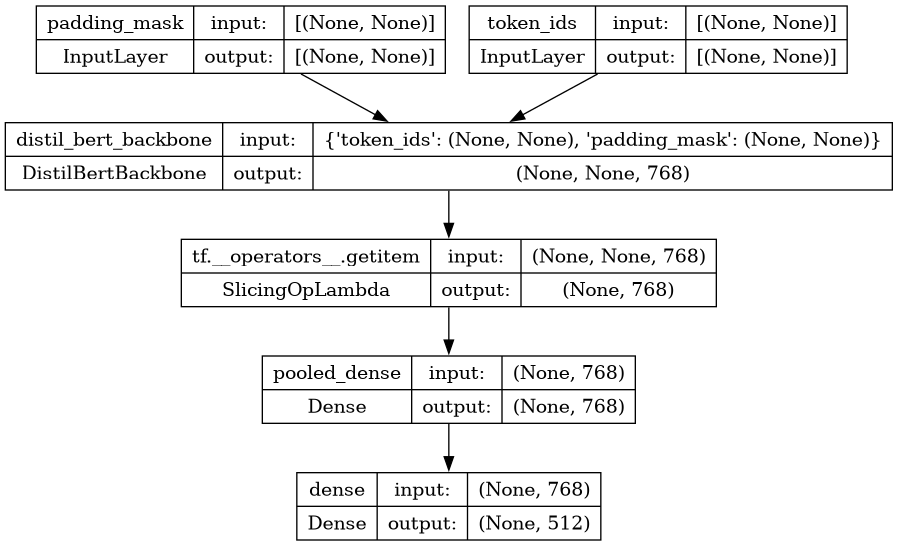

In [12]:
from keras.utils import plot_model
plot_model(model_txt, show_shapes=True, show_layer_names=True)

In [13]:
model_txt.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 padding_mask (InputLayer)   [(None, None)]               0         []                            
                                                                                                  
 token_ids (InputLayer)      [(None, None)]               0         []                            
                                                                                                  
 distil_bert_backbone (Dist  (None, None, 768)            1347340   ['padding_mask[0][0]',        
 ilBertBackbone)                                          80         'token_ids[0][0]']           
                                                                                                  
 tf.__operators__.getitem (  (None, 768)                  0         ['distil_bert_backbone[0][

### **VGG16**

In [14]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, VGG16

# Load the pre-trained VGG16 model
base_model_img = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model_img.output
x = Flatten()(x)
img_features = Dense(512, activation='relu')(x)
# predictions = Dense(4, activation='sigmoid')(x)  # Sigmoid activation for multi-label
model_img = Model(inputs=base_model_img.input, outputs=img_features)

for layer in base_model_img.layers:
    layer.trainable = False


58889256/58889256 [==============================] - 0s 0us/step


In [15]:
X_train_img = preprocess_input(X_train_img)
X_val_img = preprocess_input(X_val_img)

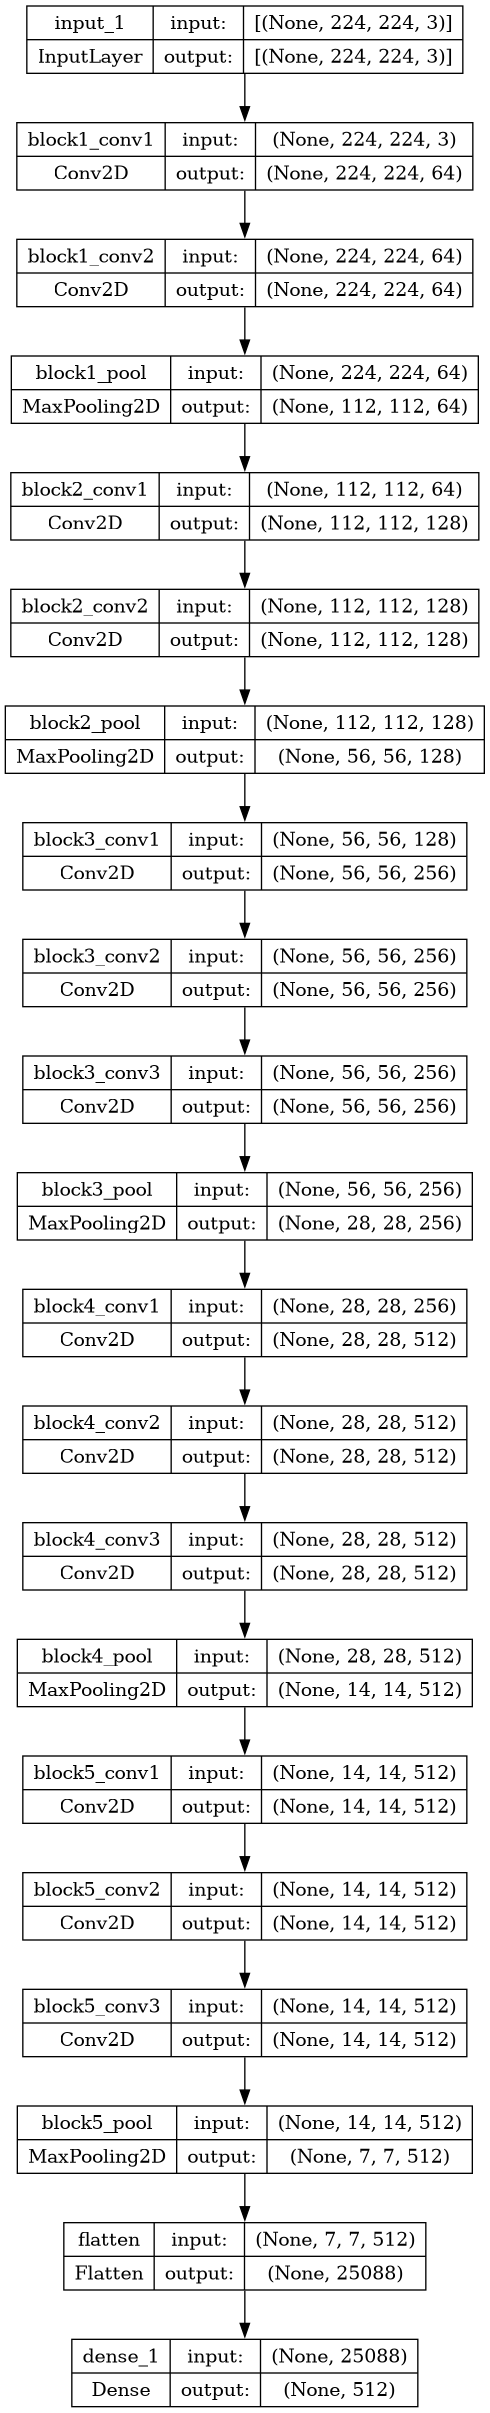

In [16]:
from keras.utils import plot_model
plot_model(model_img, show_shapes=True, show_layer_names=True)
# model_img.summary()
# model_txt.summary()

In [18]:
# Define input layers
text_input = base_model_text.input
img_input = base_model_img.input

# Concatenate features
combined_features = keras.layers.concatenate([txt_features, img_features])

# Final prediction layer (adjust number of neurons based on your task)
predictions = keras.layers.Dense(4, activation='sigmoid')(combined_features)

# Create the final model
model = Model(inputs=[text_input, img_input], outputs=predictions)

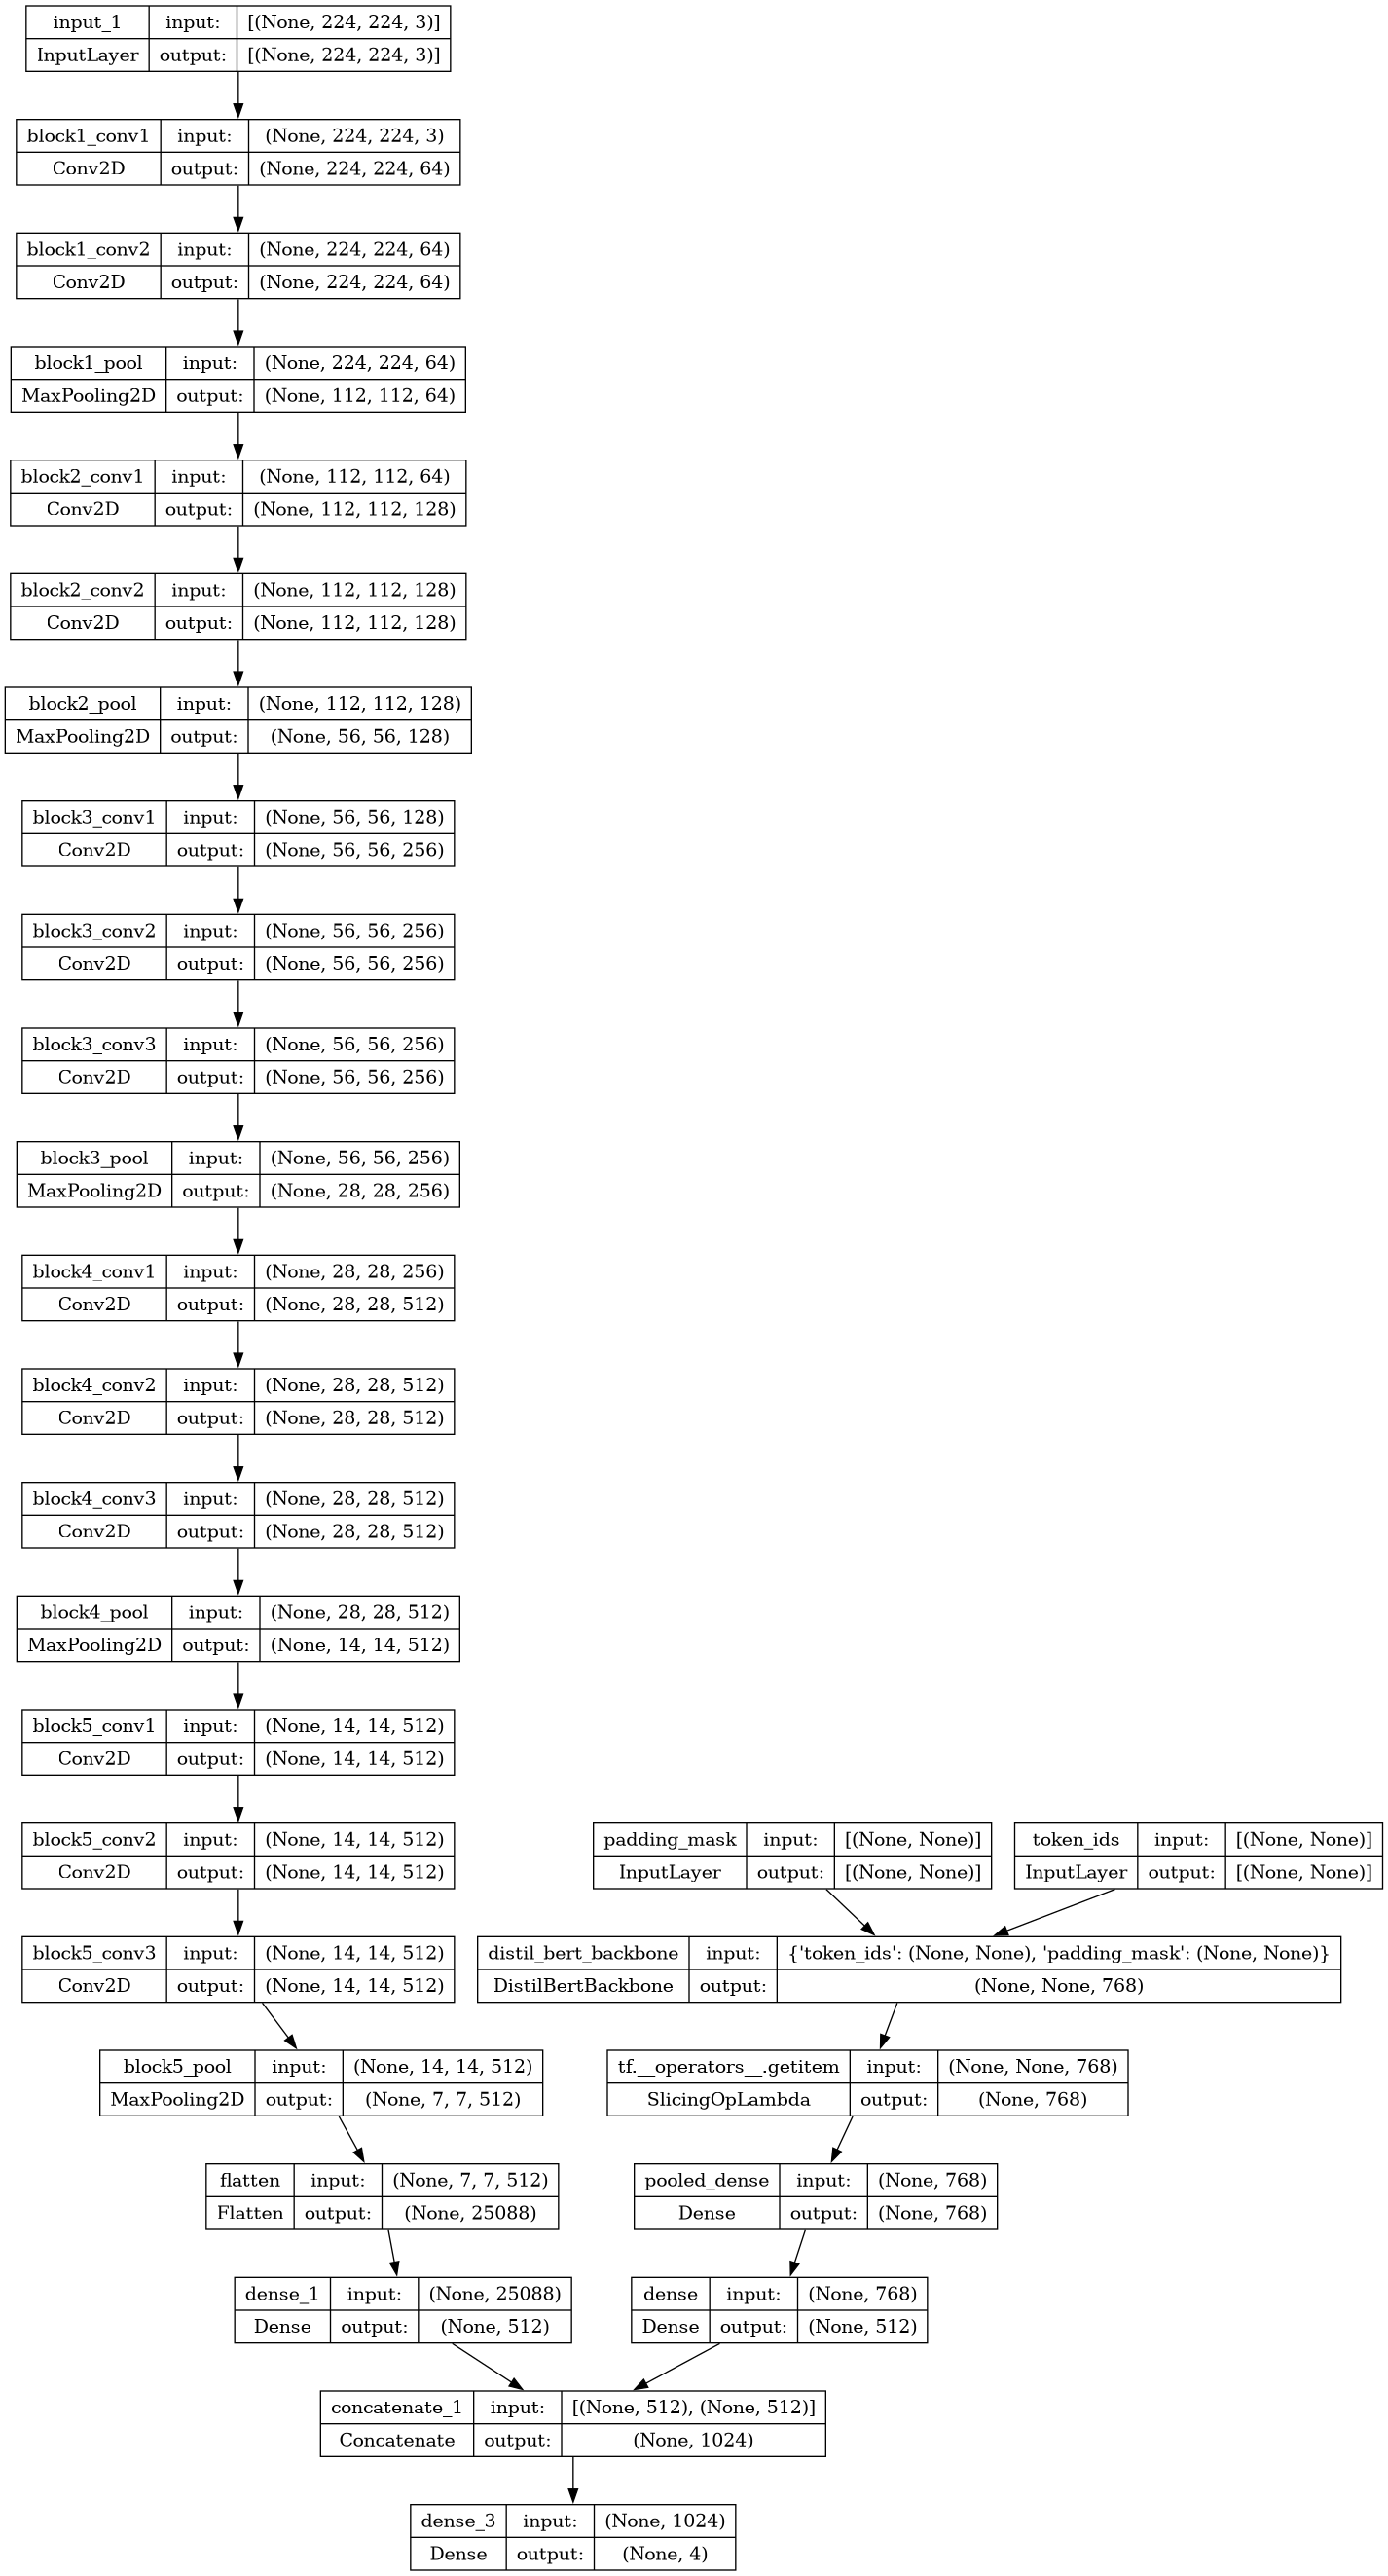

In [19]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [20]:
# Compile the model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy']
             )


In [21]:
# Train the combined model
model.fit(
    x=[preprocessor(X_train_txt), X_train_img],  # Input data: text and image features
    y=Y_train,                      # Target data
    epochs=25,                      # Number of epochs
    batch_size=12,                  # Batch size
    validation_data=([preprocessor(X_val_txt), X_val_img], Y_val)
)


Epoch 1/25


I0000 00:00:1715247286.338705     132 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


584/584 [==============================] - 96s 143ms/step - loss: 0.8922 - accuracy: 0.7694 - val_loss: 0.3985 - val_accuracy: 0.9347
Epoch 2/25
584/584 [==============================] - 82s 140ms/step - loss: 0.5378 - accuracy: 0.8159 - val_loss: 0.3945 - val_accuracy: 0.9193
Epoch 3/25
584/584 [==============================] - 82s 140ms/step - loss: 0.4905 - accuracy: 0.8144 - val_loss: 0.4395 - val_accuracy: 0.9287
Epoch 4/25
584/584 [==============================] - 82s 140ms/step - loss: 0.4733 - accuracy: 0.8023 - val_loss: 0.4387 - val_accuracy: 0.8327
Epoch 5/25
584/584 [==============================] - 82s 140ms/step - loss: 0.4663 - accuracy: 0.7859 - val_loss: 0.4152 - val_accuracy: 0.8927
Epoch 6/25
584/584 [==============================] - 82s 140ms/step - loss: 0.4511 - accuracy: 0.7819 - val_loss: 0.4157 - val_accuracy: 0.9240
Epoch 7/25
584/584 [==============================] - 82s 140ms/step - loss: 0.4420 - accuracy: 0.7816 - val_loss: 0.3918 - val_accuracy: 0.7

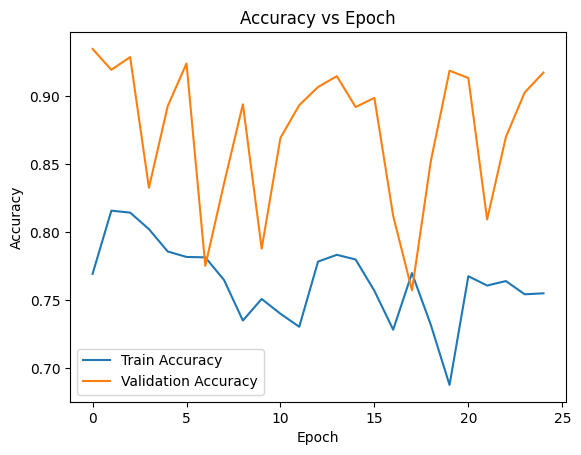

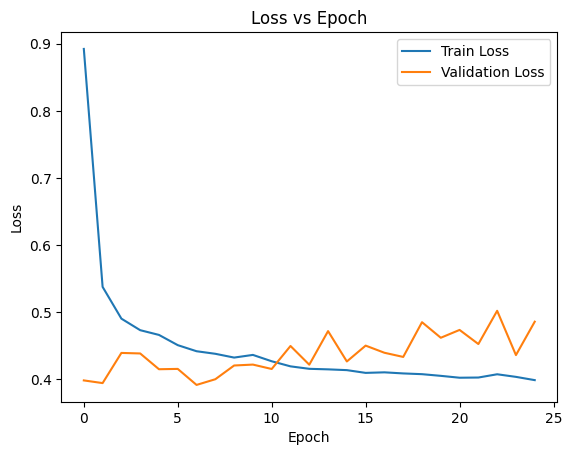

In [22]:
# Plot accuracy vs epoch
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss vs epoch
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
predicted = model.predict([preprocessor(X_val_txt),X_val_img])

47/47 [==============================] - 31s 451ms/step


In [24]:
# Threshold value for considering a class as present
threshold = 0.5

# Convert predicted probabilities to binary array
predicted = (predicted > threshold).astype(int)

In [25]:
accuracy_arr = []
f1_arr = []
precision_arr = []
recall_arr = []

In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Evaluate accuracy
humour_accuracy = accuracy_score(Y_val[:,0], predicted[:,0])

# Calculate F1 score
humour_f1 = f1_score(Y_val[:,0], predicted[:,0], average='weighted')

# Calculate precision
humour_precision = precision_score(Y_val[:,0], predicted[:,0], average='weighted')

# Calculate recall
humour_recall = recall_score(Y_val[:,0], predicted[:,0], average='weighted')

accuracy_arr.append(humour_accuracy)
f1_arr.append(humour_f1)
precision_arr.append(humour_precision)
recall_arr.append(humour_recall)

print("Score of Humour Detection")
print("Accuracy:", humour_accuracy)
print("F1 Score:", humour_f1)
print("Precision:", humour_precision)
print("Recall:", humour_recall)

Score of Humour Detection
Accuracy: 0.9306666666666666
F1 Score: 0.9004585635359117
Precision: 0.8721498327759197
Recall: 0.9306666666666666


In [27]:
# Evaluate accuracy
sarcasm_accuracy = accuracy_score(Y_val[:,1], predicted[:,1])

# Calculate F1 score
sarcasm_f1 = f1_score(Y_val[:,1], predicted[:,1], average='weighted')

# Calculate precision
sarcasm_precision = precision_score(Y_val[:,1], predicted[:,1], average='weighted')

# Calculate recall
sarcasm_recall = recall_score(Y_val[:,1], predicted[:,1], average='weighted')

accuracy_arr.append(sarcasm_accuracy)
f1_arr.append(sarcasm_f1)
precision_arr.append(sarcasm_precision)
recall_arr.append(sarcasm_recall)

print("Score of Sarcasm Detection")
print("Accuracy:", sarcasm_accuracy)
print("F1 Score:", sarcasm_f1)
print("Precision:", sarcasm_precision)
print("Recall:", sarcasm_recall)

Score of Sarcasm Detection
Accuracy: 0.9133333333333333
F1 Score: 0.876418118466899
Precision: 0.8423710649698594
Recall: 0.9133333333333333


In [28]:
# Evaluate accuracy
offensive_accuracy = accuracy_score(Y_val[:,2], predicted[:,2])

# Calculate F1 score
offensive_f1 = f1_score(Y_val[:,2], predicted[:,2], average='weighted')

# Calculate precision
offensive_precision = precision_score(Y_val[:,2], predicted[:,2], average='weighted')

# Calculate recall
offensive_recall = recall_score(Y_val[:,2], predicted[:,2], average='weighted')

accuracy_arr.append(offensive_accuracy)
f1_arr.append(offensive_f1)
precision_arr.append(offensive_precision)
recall_arr.append(offensive_recall)

print("Score of Offensive Detection")
print("Accuracy:", offensive_accuracy)
print("F1 Score:", offensive_f1)
print("Precision:", offensive_precision)
print("Recall:", offensive_recall)

Score of Offensive Detection
Accuracy: 0.468
F1 Score: 0.4197510752163568
Precision: 0.5309241934445592
Recall: 0.468


In [29]:
# Evaluate accuracy
motivation_accuracy = accuracy_score(Y_val[:,3], predicted[:,3])

# Calculate F1 score
motivation_f1 = f1_score(Y_val[:,3], predicted[:,3], average='weighted')

# Calculate precision
motivation_precision = precision_score(Y_val[:,3], predicted[:,3], average='weighted')

# Calculate recall
motivation_recall = recall_score(Y_val[:,3], predicted[:,3], average='weighted')

accuracy_arr.append(motivation_accuracy)
f1_arr.append(motivation_f1)
precision_arr.append(motivation_precision)
recall_arr.append(motivation_recall)

print("Score of Motivation Detection")
print("Accuracy:", motivation_accuracy)
print("F1 Score:", motivation_f1)
print("Precision:", motivation_precision)
print("Recall:", motivation_recall)

Score of Motivation Detection
Accuracy: 0.9693333333333334
F1 Score: 0.9562076280749268
Precision: 0.9434326430639056
Recall: 0.9693333333333334


In [30]:
accuracy_arr = np.array(accuracy_arr)
f1_arr = np.array(f1_arr)
precision_arr = np.array(precision_arr)
recall_arr = np.array(recall_arr)
print("Average scores :")
print("Avg accuracy:",np.mean(accuracy_arr))
print("Avg f1 score:",np.mean(f1_arr))
print("Avg precision",np.mean(precision_arr))
print("Avg recall:",np.mean(recall_arr))

Average scores :
Avg accuracy: 0.8203333333333334
Avg f1 score: 0.7882088463235236
Avg precision 0.797219433563561
Avg recall: 0.8203333333333334
